In [1]:
### model
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import Sequential
from keras import optimizers
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow import keras
import numpy as np
from glob import glob
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

class_num = 5
model = Sequential()

model.add(Conv2D(16,(2,2),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(16,(2,2),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(2,2),activation='relu6'))
model.add(MaxPool2D(2,2))




model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(class_num,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 16)      1040      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 32)        2080      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 32)       0

In [2]:
op = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer=op,
  metrics=['accuracy']
)

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  brightness_range=(0.4, 0.7),
                                  vertical_flip= True,
                                  horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'D:\Importants\12th Semester\ML\BPLD Dataset\train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory(r'D:\Importants\12th Semester\ML\BPLD Dataset\val',
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(r'D:\Importants\12th Semester\ML\BPLD Dataset\test',
                                           target_size = (224,224),
                                           batch_size = 1,
                                           class_mode = 'categorical')



#model.optimizer.get_config()

Found 3584 images belonging to 5 classes.
Found 448 images belonging to 5 classes.
Found 448 images belonging to 5 classes.


In [4]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

filepath = r'D:\Importants\12th Semester\ML\weight\bpld.h5'



checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,save_weights_only=True,
                             save_best_only=True, mode='max')

log_csv = CSVLogger(r'D:\Importants\12th Semester\ML\weight\bpld.csv', separator=',', append=False)

callbacks_list = [checkpoint1, log_csv]



r = model.fit_generator(
    training_set,
    epochs=100,
    validation_data=val_set,
    steps_per_epoch = len(training_set),
    validation_steps=len(val_set),
    callbacks=callbacks_list,
    shuffle=False
)

Epoch 1/100


C:\Users\babul\AppData\Local\Temp\ipykernel_3796\450822291.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


112/112 [==============================] - ETA: 0s - loss: 1.4447 - accuracy: 0.3499
Epoch 1: val_accuracy improved from -inf to 0.48438, saving model to D:\Importants\12th Semester\ML\weight\bpld.h5
112/112 [==============================] - 21s 166ms/step - loss: 1.4447 - accuracy: 0.3499 - val_loss: 1.1452 - val_accuracy: 0.4844
Epoch 2/100
112/112 [==============================] - ETA: 0s - loss: 1.1083 - accuracy: 0.5435
Epoch 2: val_accuracy improved from 0.48438 to 0.55134, saving model to D:\Importants\12th Semester\ML\weight\bpld.h5
112/112 [==============================] - 18s 158ms/step - loss: 1.1083 - accuracy: 0.5435 - val_loss: 1.1015 - val_accuracy: 0.5513
Epoch 3/100
112/112 [==============================] - ETA: 0s - loss: 0.9514 - accuracy: 0.6191
Epoch 3: val_accuracy improved from 0.55134 to 0.66295, saving model to D:\Importants\12th Semester\ML\weight\bpld.h5
112/112 [==============================] - 17s 154ms/step - loss: 0.9514 - accuracy: 0.6191 - val_loss

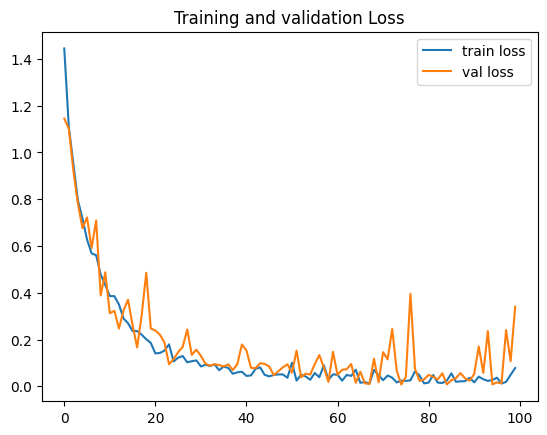

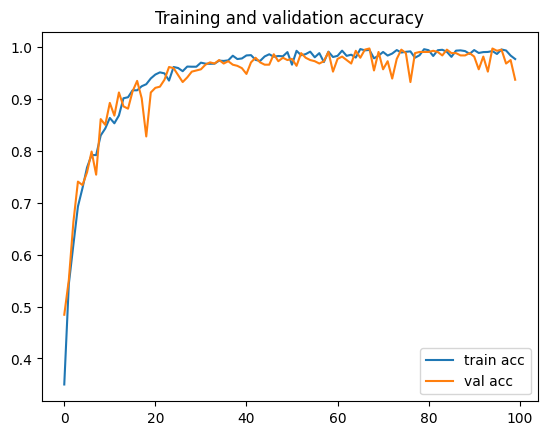

<Figure size 640x480 with 0 Axes>

In [5]:
#plot of accuracy and loss

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [6]:
model.load_weights(filepath)
Adam = keras.optimizers.Adam(lr=0.001)


preds = model.evaluate_generator(test_set)
print ("Loss = ",float(preds[0]))
print ("Test Accuracy = ",float(preds[1])*100)

C:\Users\babul\miniconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\babul\AppData\Local\Temp\ipykernel_3796\3381981596.py:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  preds = model.evaluate_generator(test_set)


Loss =  0.049488481134176254
Test Accuracy =  98.66071343421936


In [7]:
### for f1 score and other values import files ### 

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
### matrics
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

1/1 [==============================] - 0s 19ms/step


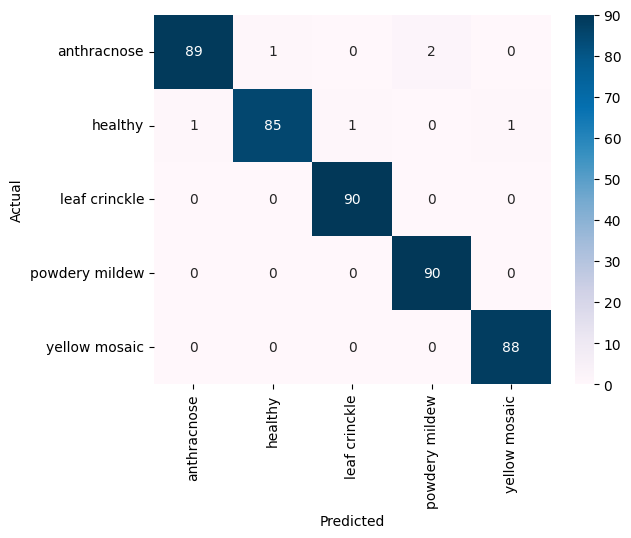

In [8]:
import pandas as pd
import seaborn as sn
import tensorflow as tf
model.load_weights(filepath)
filenames=test_set.filenames
nb_samples=len(test_set)
y_prob=[]
y_act=[]
test_set.reset()
for _ in range (nb_samples):
    X_test,Y_test = test_set.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
predicted_class=[list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class=[list(training_set.class_indices.keys())[i.argmax()]for i in y_act]
out_df=pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix=pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])
import matplotlib.pyplot as plt
sn.heatmap(confusion_matrix,cmap='PuBu', annot=True, fmt='d')
plt.show()

In [9]:
import numpy as np
import pandas as pd

# Assuming you have already created the DataFrame 'out_df' with predicted and actual classes
# out_df = ...

# Get the unique classes from the DataFrame
unique_classes = out_df['actual_class'].unique()

# Calculate true positives, false positives, and false negatives for each class
TP = np.array([np.sum((out_df['predicted_class'] == cls) & (out_df['actual_class'] == cls)) for cls in unique_classes])
FP = np.array([np.sum((out_df['predicted_class'] == cls) & (out_df['actual_class'] != cls)) for cls in unique_classes])
FN = np.array([np.sum((out_df['predicted_class'] != cls) & (out_df['actual_class'] == cls)) for cls in unique_classes])

# Calculate precision, recall, and F1 score for each class
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate the overall precision, recall, and F1 score for all classes (weighted average)
overall_precision = np.sum(precision * (TP + FN)) / np.sum(TP + FN)
overall_recall = np.sum(recall * (TP + FN)) / np.sum(TP + FN)
overall_f1_score = 2 * (overall_precision * overall_recall) / (overall_precision + overall_recall)

# Print the results
print("Precision for each class:")
print(precision)
print("\nRecall for each class:")
print(recall)
print("\nF1 score for each class:")
print(f1_score)
print("\nOverall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("Overall F1 Score:", overall_f1_score)


Precision for each class:
[0.98837209 0.97826087 0.98901099 0.98888889 0.98876404]

Recall for each class:
[0.96590909 1.         1.         0.9673913  1.        ]

F1 score for each class:
[0.97701149 0.98901099 0.99447514 0.97802198 0.99435028]

Overall Precision: 0.9866522883721853
Overall Recall: 0.9866071428571429
Overall F1 Score: 0.9866297150982298


In [11]:
import numpy as np
import pandas as pd

# Assuming you have already created the DataFrame 'out_df' with predicted and actual classes
# out_df = ...

# Get the unique classes from the DataFrame
unique_classes = out_df['actual_class'].unique()

# Calculate true positives, false positives, false negatives, and true negatives for each class
TP = np.array([np.sum((out_df['predicted_class'] == cls) & (out_df['actual_class'] == cls)) for cls in unique_classes])
FP = np.array([np.sum((out_df['predicted_class'] == cls) & (out_df['actual_class'] != cls)) for cls in unique_classes])
FN = np.array([np.sum((out_df['predicted_class'] != cls) & (out_df['actual_class'] == cls)) for cls in unique_classes])
TN = np.array([np.sum((out_df['predicted_class'] != cls) & (out_df['actual_class'] != cls)) for cls in unique_classes])

# Calculate False Positive Rate (FPR), False Negative Rate (FNR), Specificity, False Discovery Rate (FDR), and Negative Predictive Value (NPV) for each class
fpr = FP / (FP + TN)
fnr = FN / (TP + FN)
specificity = 1 - fpr
fdr = FP / (TP + FP)
npv = TN / (TN + FN)

# Calculate overall accuracy for FPR, FNR, Specificity, FDR, and NPV
overall_fpr_accuracy = np.sum((TN / (FP + TN)) * (FP + TN)) / np.sum(FP + TN)
overall_fnr_accuracy = np.sum((TP / (TP + FN)) * (TP + FN)) / np.sum(TP + FN)
overall_specificity_accuracy = np.sum((TP / (TP + FN)) * (TP + FN)) / np.sum(TP + FN)
overall_fdr_accuracy = np.sum((TP / (TP + FP)) * (TP + FP)) / np.sum(TP + FP)
overall_npv_accuracy = np.sum((TN / (TN + FN)) * (TN + FN)) / np.sum(TN + FN)

# Print the results
print("Overall Accuracy for False Positive Rate (FPR):", overall_fpr_accuracy)
print("Overall Accuracy for False Negative Rate (FNR):", overall_fnr_accuracy)
print("Overall Accuracy for Specificity:", overall_specificity_accuracy)
print("Overall Accuracy for False Discovery Rate (FDR):", overall_fdr_accuracy)
print("Overall Accuracy for Negative Predictive Value (NPV):", overall_npv_accuracy)


Overall Accuracy for False Positive Rate (FPR): 0.9966517857142857
Overall Accuracy for False Negative Rate (FNR): 0.9866071428571429
Overall Accuracy for Specificity: 0.9866071428571429
Overall Accuracy for False Discovery Rate (FDR): 0.9866071428571429
Overall Accuracy for Negative Predictive Value (NPV): 0.9966517857142857
